<br>

# **상관관계 분석 (Correlation Analysis)**  

두 개의 변수가 서로 관련이 있는지 확인한다.  






<br>

## 🔸 공분산  


변수가 하나일 때 분산은 거리와 관련이 있다.  
변수가 두개일 때는 거리와 방향을 갖게 된다.


In [ ]:
import numpy as np

print(np.var(np.arange(1, 6)))
print(np.var(np.arange(2, 7)))

print(np.cov(np.arange(1,6), np.arange(2,7)))
print(np.cov(np.arange(1,6), (3,3,3,3,3)))
print(np.cov(np.arange(1,6), np.arange(6,1,-1)))

2.0
2.0
[[2.5 2.5]
 [2.5 2.5]]
[[2.5 0. ]
 [0.  0. ]]
[[ 2.5 -2.5]
 [-2.5  2.5]]


In [ ]:
x = [8,3,6,6,9,4,3,9,3,4]
print('x평균:', np.mean(x))
print('x분산:', np.var(x))
print()

y = [6,2,4,6,9,5,1,8,4,5]
print('y평균:', np.mean(y))
print('y분산:', np.var(y))
print()

#공분산
print('x와 y의 공분산 행렬:', np.cov(x,y))
print('x와 y의 공분산:', np.cov(x,y)[0, 1])

x평균: 5.5
x분산: 5.45

y평균: 5.0
y분산: 5.4

x와 y의 공분산 행렬: [[6.05555556 5.22222222]
 [5.22222222 6.        ]]
x와 y의 공분산: 5.222222222222222



두 확률변수가 양의 상관관계를 갖는 것을 확인할 수 있다.  





공분산만으로는 상관관계가 얼마나 강한 지, 혹은 약한 지는 알 수 없다. 단위에 따라 공분산의 크기가 달라지므로 절대적 크기로는 판단이 어렵다.   

-> 상관계수로 비교하여 판단한다. 공분산을 표준화한 것이 상관계수이다. 상관계수를 이용하여 확인하면 상관관계의 강도(세기)를 알 수 있다.  



<br>

## 🔸 상관계수 

상관관계의 방향과 세기를 모두 알 수 있다.  

r = X와 Y가 함께 변하는 정도 (공분산) / X와 Y가 각각 변하는 정도 (각각의 분산)

일반적으로  
> r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,  
r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,  
r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,  
r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,  
r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,  
r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,  
r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계  



In [ ]:
print('x와 y의 상관계수 행렬:', np.corrcoef(x,y))
print('x와 y의 상관계수:', np.corrcoef(x,y)[0,1])

x와 y의 상관계수 행렬: [[1.         0.86636865]
 [0.86636865 1.        ]]
x와 y의 상관계수: 0.8663686463212855


<br>

## 🔸 시각화로 분포 확인 



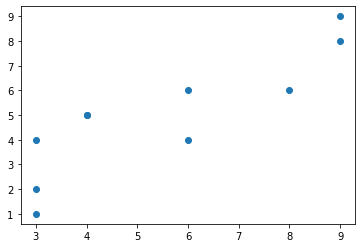

In [ ]:
import matplotlib.pyplot as plt

plt.plot(x, y, 'o')
plt.show()

<br>

## 🔸 데이터가 비선형일 경우 (곡선형태)


0.0
0.0


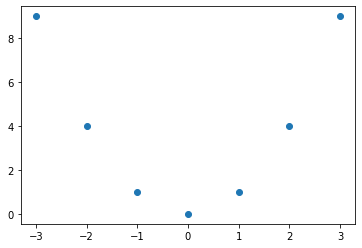

In [ ]:
m = [-3,-2,-1,0,1,2,3]
n = [9,4,1,0,1,4,9]

print(np.cov(m,n)[0,1])
print(np.corrcoef(m,n)[0,1])

plt.plot(m, n, 'o')
plt.show()


상관계수는 기본적으로 선형데이터로부터 구할 수 있다. 비선형일 때는 공분산과 상관관계수 측정이 곤란하다.  

Pearson 상관 계수는 선형 관계만 측정하고 Spearman 상관계수는 단순 관계만 측정한다.  
상관계수가 0이어도 의미 있는 관계가 존재할 수 있다는 것이다. 
그러므로 산점도를 통해 분포를 확인해야 한다.  



<br>

## 실습 1) 친밀도와 적절성에 따른 만족도 




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/testdata/drinking_water.csv')
print(df.head(3))
print(df.describe())

   친밀도  적절성  만족도
0    3    4    3
1    3    3    2
2    4    4    4
              친밀도         적절성         만족도
count  264.000000  264.000000  264.000000
mean     2.928030    3.132576    3.094697
std      0.970345    0.859657    0.828744
min      1.000000    1.000000    1.000000
25%      2.000000    3.000000    3.000000
50%      3.000000    3.000000    3.000000
75%      4.000000    4.000000    4.000000
max      5.000000    5.000000    5.000000


In [ ]:
#표준편차
print(np.std(df.친밀도))
print(np.std(df.적절성))
print(np.std(df.만족도))

0.968505126935272
0.8580277077642035
0.8271724742228969


In [ ]:
plt.hist([np.std(df.친밀도), np.std(df.적절성), np.std(df.만족도)])
plt.show()

NameError: ignored

<br>

### 공분산  

In [ ]:
print(np.cov(df.친밀도, df.적절성))  #np.cov()는 인수를 두 개만 가짐
print(np.cov(df.친밀도, df.만족도))
print()

print(df.cov())

[[0.94156873 0.41642182]
 [0.41642182 0.73901083]]
[[0.94156873 0.37566252]
 [0.37566252 0.68681588]]

          친밀도       적절성       만족도
친밀도  0.941569  0.416422  0.375663
적절성  0.416422  0.739011  0.546333
만족도  0.375663  0.546333  0.686816


<br>

### 상관계수  

In [ ]:
print(np.corrcoef(df.친밀도, df.적절성))
print(np.corrcoef(df.친밀도, df.만족도))
print()

print(df.corr())
print(df.corr(method='pearson'))   #변수가 등간, 비율척도. 정규성을 따름
print(df.corr(method='spearman'))  #변수가 서열척도
print(df.corr(method='kendall'))   #spearman과 유사

[[1.         0.49920861]
 [0.49920861 1.        ]]
[[1.         0.46714498]
 [0.46714498 1.        ]]

          친밀도       적절성       만족도
친밀도  1.000000  0.499209  0.467145
적절성  0.499209  1.000000  0.766853
만족도  0.467145  0.766853  1.000000
          친밀도       적절성       만족도
친밀도  1.000000  0.499209  0.467145
적절성  0.499209  1.000000  0.766853
만족도  0.467145  0.766853  1.000000
          친밀도       적절성       만족도
친밀도  1.000000  0.511078  0.501201
적절성  0.511078  1.000000  0.748510
만족도  0.501201  0.748510  1.000000
          친밀도       적절성       만족도
친밀도  1.000000  0.466729  0.459353
적절성  0.466729  1.000000  0.703214
만족도  0.459353  0.703214  1.000000


<br>

### 만족도에 대한 다른 특성 사이의 상관관계 파악  



In [ ]:
coRe = df.corr()

print(coRe['만족도'].sort_values(ascending=False))

만족도    1.000000
적절성    0.766853
친밀도    0.467145
Name: 만족도, dtype: float64


<br>

### 시각화


In [ ]:
#그래프를 위한 글꼴설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (42.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160837 files and di

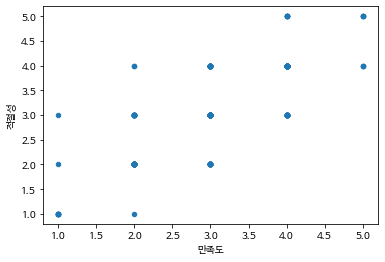

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

df.plot(kind='scatter', x='만족도', y='적절성')
plt.show()

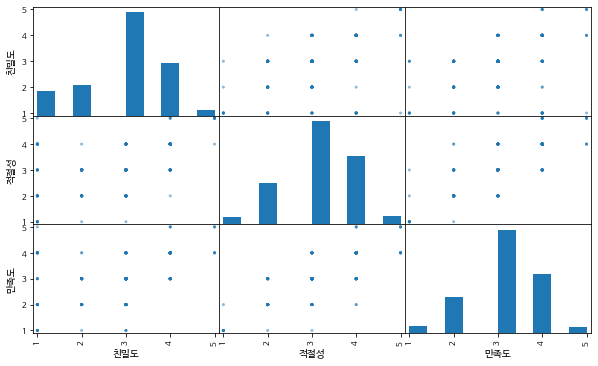

In [ ]:
from pandas.plotting import scatter_matrix

attr = ['친밀도','적절성','만족도']
scatter_matrix(df[attr], figsize = (10, 6))
plt.show()

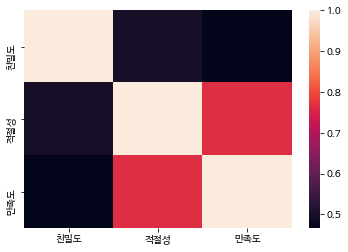

In [ ]:
import seaborn as sns
sns.heatmap(df.corr())

plt.show()

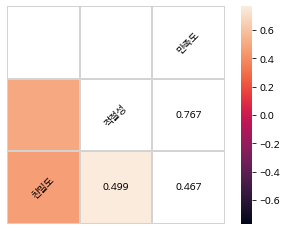

In [ ]:
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
vmax = np.abs(corr.values[~mask]).max()

fig, ax = plt.subplots()
sns.heatmap(corr, mask=mask, vmin=-vmax, vmax=vmax, square=True, linecolor='lightgray', linewidths=1, ax=ax)

for i in range(len(corr)):
  ax.text(i + 0.5, len(corr) - (i + 0.5), corr.columns[i], ha = 'center', va = 'center', rotation = 45)
  for j in range(i + 1, len(corr)):
    s = '{:.3f}'.format(corr.values[i, j])
    ax.text(j + 0.5, len(corr) - (i + 0.5), s, ha = 'center', va = 'center')

ax.axis('off')
plt.show()

<br>

## 실습 2) 나라별 외국인 방문객 수   

국내 유료관광지에 대해 외국인 (일본, 중국, 미국) 방문자료로 



r1: -0.05879110406006314
r2: 0.2774443570141011
r3: 0.4028160633050156


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


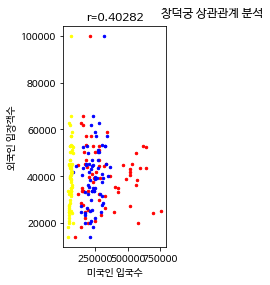

r1: 0.44594488384450376
r2: 0.30261521828798604
r3: 0.2812576500158649


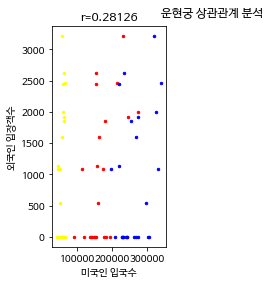

r1: 0.5256734293511215
r2: -0.43522818613412334
r3: 0.4251372638704492


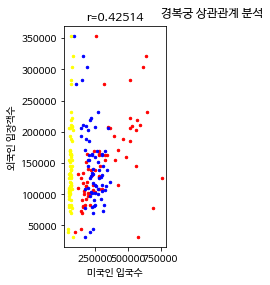

r1: 0.4512325398089607
r2: -0.16458589402253013
r3: 0.6245403780269381


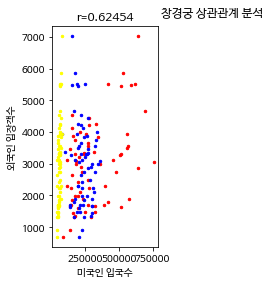

r1: -0.5834218986767473
r2: 0.5298702802205213
r3: -0.1211266682929496


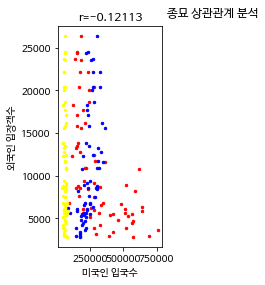

           중국        일본        미국
고궁명                              
창덕궁 -0.058791  0.277444  0.402816
운현궁  0.445945  0.302615  0.281258
경복궁  0.525673 -0.435228  0.425137
창경궁  0.451233 -0.164586  0.624540
종묘  -0.583422  0.529870 -0.121127


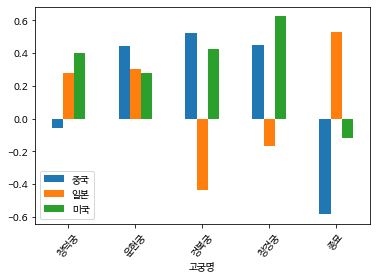

In [ ]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def setScatterChart(tour_table, all_table, tourPoint):
  tour = tour_table[tour_table['resNm'] == tourPoint]
  #print(tour)  #201101   창덕궁   14137  방문날짜, 방문지, 방문건수

  merge_table = pd.merge(tour, all_table, left_index=True, right_index=True)
  #print(merge_table)

  #시각화
  fig = plt.figure()
  fig.suptitle(tourPoint + ' 상관관계 분석')

  ##중국
  plt.subplot(1, 3, 1)
  plt.xlabel('중국인 입국수')
  plt.ylabel('외국인 입장객수')
  lamb1 = lambda p:merge_table['china'].corr(merge_table['ForNum'])
  r1 = lamb1(merge_table)
  print('r1:', r1)
  plt.title('r={:.5f}'.format(r1))
  plt.scatter(merge_table['china'], merge_table['ForNum'], s=6, c='red')
  #plt.show()

  ##일본
  plt.subplot(1, 3, 1)
  plt.xlabel('일본인 입국수')
  plt.ylabel('외국인 입장객수')
  lamb2 = lambda p:merge_table['japan'].corr(merge_table['ForNum'])
  r2 = lamb2(merge_table)
  print('r2:', r2)
  plt.title('r={:.5f}'.format(r2))
  plt.scatter(merge_table['japan'], merge_table['ForNum'], s=6, c='blue')
  #plt.show()

  ##미국
  plt.subplot(1, 3, 1)
  plt.xlabel('미국인 입국수')
  plt.ylabel('외국인 입장객수')
  lamb3 = lambda p:merge_table['usa'].corr(merge_table['ForNum'])
  r3 = lamb3(merge_table)
  print('r3:', r3)
  plt.title('r={:.5f}'.format(r3))
  plt.scatter(merge_table['usa'], merge_table['ForNum'], s=6, c='yellow')

  plt.tight_layout()
  plt.show()

  return [tourPoint, r1, r2, r3]


def startFunc():
  fname = '/content/drive/MyDrive/testdata/서울특별시_관광지입장정보_2011_2016.json'
  jsonTP = json.loads(open(fname, 'r', encoding='utf-8').read())
  #print(jsonTP)

  tour_table = pd.DataFrame(jsonTP, columns=('yyyymm','resNm','ForNum')).set_index('yyyymm')
  #print(tour_table.head(5))

  resNm = tour_table.resNm.unique()
  #print(resNm)
  #print('관광지명:', resNm[:5])  #다섯 가지만

  #중국인 방문 관광지 정보
  cjson = '/content/drive/MyDrive/testdata/중국인방문객.json'
  jdata = json.loads(open(cjson, 'r', encoding='utf-8').read())
  china_table = pd.DataFrame(jdata, columns=('yyyymm', 'visit_cnt')).set_index('yyyymm')
  china_table = china_table.rename(columns={'visit_cnt':'china'})
  #print(china_table.head(3))

  #일본인 방문 관광지 정보
  jjson = '/content/drive/MyDrive/testdata/일본인방문객.json'
  jdata = json.loads(open(jjson, 'r', encoding='utf-8').read())
  japan_table = pd.DataFrame(jdata, columns=('yyyymm', 'visit_cnt')).set_index('yyyymm')
  japan_table = japan_table.rename(columns={'visit_cnt':'japan'})
  #print(japan_table.head(3))

  #미국인 방문 관광지 정보
  ujson = '/content/drive/MyDrive/testdata/미국인방문객.json'
  jdata = json.loads(open(ujson, 'r', encoding='utf-8').read())
  usa_table = pd.DataFrame(jdata, columns=('yyyymm', 'visit_cnt')).set_index('yyyymm')
  usa_table = usa_table.rename(columns={'visit_cnt':'usa'})
  #print(usa_table.head(3))

  #테이블 병합
  all_table = pd.merge(china_table, japan_table, left_index = True, right_index=True)
  all_table = pd.merge(all_table, usa_table, left_index = True, right_index=True)
  #print(all_table.head(5))

  r_list = []
  for tourPoint in resNm[:5]:
    r_list.append(setScatterChart(tour_table, all_table, tourPoint))

  r_df = pd.DataFrame(r_list, columns=['고궁명','중국','일본','미국'])
  r_df = r_df.set_index('고궁명')
  print(r_df)

  r_df.plot(kind='bar', rot=50)
  plt.show()


if __name__=='__main__':
  startFunc()